# Paleontology Machine Learning Project


---

## Explanation 

This project is based on a data base found on https://data.world/bryon/paleobiodb. It is called Paleobilogy Database and is a public database of paleontological data.
This database contains the list of fossiles found on earth with their found locations,descriptions, genuses etc.. 


**What are the main objectives of this project?** 
- study the data attributes to estimate which factors are most important when determining the identity of a given fossil sample.
- test multiple machine learning algorithm to predict the genus of a fossile according to its features.
- compare efficiency/accuracy of those algorithms to understand which algorithm is best fitted for this type of machine learning problem.

---


## Glossary <a id='glossary'></a>
 0) [Processing data](#processing_data)
 1) [KNN in 2D](#knn2D)
 2) [KNN in 3D](#knn3d)
 3) [Logistic regression](#logistic_regression)
 4) [Decision tree](#decision_tree)
 5) [PCA for higher dimensions](#pca)

(you can click on the links to jump directly to each subpart)

---

#### Import libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Import stuff for k-nearest neighbor 
import sklearn.neighbors
import sklearn.linear_model
from sklearn.utils import shuffle
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
#from mpl_toolkits.basemap import Basemap


#import google.colab
#from google.colab import files
#uploaded = files.upload()

---

## 0) Processing data <a id='processing_data'> </a>

In [2]:
data = pd.read_csv('thegigafile.csv')

In [3]:
#Vizualising data 
data

max_ma  min_ma           genus        lng        lat  paleolng  \
0        353.8   345.3  Australosutura -98.099998  31.000000    -65.59   
1        353.8   345.3  Carbonocoryphe -98.099998  31.000000    -65.59   
2        353.8   345.3    Thigriffides -98.099998  31.000000    -65.59   
3        353.8   345.3     Pudoproetus -98.099998  31.000000    -65.59   
4        353.8   345.3     Pudoproetus -98.099998  31.000000    -65.59   
...        ...     ...             ...        ...        ...       ...   
743654    99.6    93.5       Lepicerus  96.720001  26.360001    105.50   
743655   468.1   460.9    Eremotoechia -86.784721  33.311111   -114.63   
743656   467.3   458.4    Eremotoechia -84.129166  35.741669   -112.38   
743657   467.3   458.4    Eremotoechia -84.125000  35.750000   -112.37   
743658   468.1   460.9       Pionomena -77.816666  39.599998   -104.99   

        paleolat   lithology1             composition  
0         -27.46  "carbonate"  low Mg calcite, chitin  
1         -27.46  "carbonate"  low Mg calcite, chitin  
2         -27.46  "carbonate"  low Mg calcite, chitin  
3         -27.46  "carbonate"  low Mg calcite, chitin  
4         -27.46  "carbonate"  low Mg calcite, chitin  
...          ...          ...                     ...  
743654      8.29        amber                  chitin  
743655     -8.13  "limestone"          low Mg calcite  
743656    -10.30  "limestone"          low Mg calcite  
743657    -10.29  "limestone"          low Mg calcite  
743658     -8.77  "limestone"          low Mg calcite  

[743659 rows x 9 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743659 entries, 0 to 743658
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   max_ma       743659 non-null  float64
 1   min_ma       743659 non-null  float64
 2   genus        743659 non-null  object 
 3   lng          743659 non-null  float64
 4   lat          743659 non-null  float64
 5   paleolng     743659 non-null  float64
 6   paleolat     743659 non-null  float64
 7   lithology1   743659 non-null  object 
 8   composition  743659 non-null  object 
dtypes: float64(6), object(3)
memory usage: 51.1+ MB


---
## 1) K-nearest neighbor (Space/Genus) <a id='knn2D'></a>


The first model we will implement will be a kNN model in 2 dimensions: longitude and lattitude. Then we will try using paleolongitude and paleolattitude to compare.

#### [Jump back to glossary](#glossary)

### a) Data sampling

In [5]:
#Test here on only three data frame
new_table = data[['lng', 'lat', 'genus']].copy()

In [6]:
new_table

lng        lat           genus
0      -98.099998  31.000000  Australosutura
1      -98.099998  31.000000  Carbonocoryphe
2      -98.099998  31.000000    Thigriffides
3      -98.099998  31.000000     Pudoproetus
4      -98.099998  31.000000     Pudoproetus
...           ...        ...             ...
743654  96.720001  26.360001       Lepicerus
743655 -86.784721  33.311111    Eremotoechia
743656 -84.129166  35.741669    Eremotoechia
743657 -84.125000  35.750000    Eremotoechia
743658 -77.816666  39.599998       Pionomena

[743659 rows x 3 columns]

### b) Using k-nearest neighbor with 3 genuses 

#### i) Look at the most occurences of genuses 

In [7]:
genus_counts = new_table['genus'].value_counts().reset_index()
genus_counts.columns = ['genus', 'count']
genus_counts = genus_counts.sort_values(by='count', ascending=False)

# Print the ranking
print("Ranking of genera with the most occurrences:")
for index, row in genus_counts.iterrows():
    print(f"{index+1}. {row['genus']}: {row['count']} occurrences")

Ranking of genera with the most occurrences:
1. Ostrea: 1828 occurrences
2. Composita: 1722 occurrences
3. Chlamys: 1531 occurrences
4. Inoceramus: 1368 occurrences
5. Derbyia: 1330 occurrences
6. Panderodus: 1316 occurrences
7. Nuculana: 1256 occurrences
8. Polygnathus: 1184 occurrences
9. Cleiothyridina: 1172 occurrences
10. Modiolus: 1120 occurrences
11. Favosites: 1092 occurrences
12. Atrypa: 1092 occurrences
13. Ozarkodina: 1081 occurrences
14. Dentalium: 1080 occurrences
15. Anomia: 1076 occurrences
16. Hustedia: 1075 occurrences
17. Glycymeris: 1052 occurrences
18. Bairdia: 1021 occurrences
19. Lingula: 1008 occurrences
20. Isotelus: 1001 occurrences
21. Linoproductus: 995 occurrences
22. Astarte: 957 occurrences
23. Plagiostoma: 941 occurrences
24. Porites: 923 occurrences
25. Neospirifer: 869 occurrences
26. Camptonectes: 852 occurrences
27. Palaeoneilo: 847 occurrences
28. Corbula: 846 occurrences
29. Euspira: 838 occurrences
30. Nucula: 837 occurrences
31. Platystrophia: 830

4845. Selkirkia: 32 occurrences
4832. Eocypraea: 32 occurrences
4857. Mytiloperna: 32 occurrences
4856. Paracytheridea: 32 occurrences
4855. Pseudhipparion: 32 occurrences
4854. Pseudocricetodon: 32 occurrences
4853. Bekkerina: 32 occurrences
4852. Hudsonaster: 32 occurrences
4850. Mestoronema: 32 occurrences
4849. Placopecten: 32 occurrences
4848. Verneuilinoides: 32 occurrences
4847. Neocomites (Teschenites): 32 occurrences
4846. Paralucinella: 32 occurrences
4851. Ophiura: 32 occurrences
4844. Proteuloma: 32 occurrences
4838. Rhabdactinia: 32 occurrences
4833. Parahystricurus: 32 occurrences
4834. Dunbarinella: 32 occurrences
4835. Alaskospira: 32 occurrences
4836. Urocyon: 32 occurrences
4802. Paracolobus: 32 occurrences
4837. Palaeosciurus: 32 occurrences
4839. Parafrechites: 32 occurrences
4840. Limaria (Limaria): 32 occurrences
4841. Mysella: 32 occurrences
4842. Loriolithyris: 32 occurrences
4843. Hippocardia: 32 occurrences
5011. Choanodus: 31 occurrences
5018. Lepidopecten: 3

10126. Ankoura: 13 occurrences
10134. Fabanella: 13 occurrences
10127. Phyllodermia: 13 occurrences
10128. Cycliphyllia: 13 occurrences
10129. Petasmaia: 13 occurrences
10130. Veruzhites: 13 occurrences
10131. Chedighaii: 13 occurrences
10132. Saharonetes: 13 occurrences
10118. Hanaites: 13 occurrences
10117. Egertonia: 13 occurrences
10116. Glyptocystites: 13 occurrences
10115. Mourlonopsis: 13 occurrences
10114. Palaeoplesiastraea: 13 occurrences
10113. Smilodectes: 13 occurrences
10111. Calygirtyoceras: 13 occurrences
10110. Agkistracanthus: 13 occurrences
10109. Arqoviella: 13 occurrences
10108. Stratodus: 13 occurrences
10107. Nothrotherium: 13 occurrences
10106. Eoerianthus: 13 occurrences
10105. Notoconularia: 13 occurrences
10104. Acanthoscaphites: 13 occurrences
10103. Pseudomelania (Rhabdoconcha): 13 occurrences
10102. Stichophyma: 13 occurrences
10240. Eocypraea (Eocypraea): 13 occurrences
10133. Brachymeandra: 13 occurrences
10135. Collyropsis: 13 occurrences
10168. Tavayzo

14480. Psacodromeus: 8 occurrences
14479. Tancredia (Tancredia): 8 occurrences
14478. Metussuria: 8 occurrences
14477. Magyarosaurus: 8 occurrences
14476. Semele (Semele): 8 occurrences
14383. Baris: 8 occurrences
14381. Bittiscala: 8 occurrences
14237. Cyrtulus: 8 occurrences
14308. Rectospinella: 8 occurrences
14288. Orbitoproetus: 8 occurrences
14287. Glassina: 8 occurrences
14286. Anodontopsis: 8 occurrences
14285. Acernaspis (Eskaspis): 8 occurrences
14284. Lockhartia: 8 occurrences
14283. Curtognathus: 8 occurrences
14282. Clio (Clio): 8 occurrences
14281. Actinophlebia: 8 occurrences
14280. Cupularia: 8 occurrences
14279. Lepidostoma: 8 occurrences
14278. Myrmicium: 8 occurrences
14277. Trematotrochus: 8 occurrences
14276. Spatiator: 8 occurrences
14275. Proconsul: 8 occurrences
14274. Anniculus: 8 occurrences
14289. Sphenotomorpha: 8 occurrences
14290. Laganum: 8 occurrences
14291. Altica: 8 occurrences
14300. Loborhynchapion: 8 occurrences
14306. Pericotoxodon: 8 occurrences
1

17986. Anobasicrinus: 5 occurrences
17984. Astrocorethra: 5 occurrences
18000. Eowaeringella: 5 occurrences
17983. Gyrinodon: 5 occurrences
17982. Acerorhinus: 5 occurrences
17981. Orchestes: 5 occurrences
17980. Graphoscyphia: 5 occurrences
17979. Wyella: 5 occurrences
17978. Dakotamys: 5 occurrences
17977. Liraria: 5 occurrences
17976. Tudicla (Tudicla): 5 occurrences
17975. Holoclemensia: 5 occurrences
17974. Mitraria (Mitraria): 5 occurrences
17973. Amphissa: 5 occurrences
17972. Cretadiplura: 5 occurrences
17971. Meristorygma: 5 occurrences
17999. Crassatrypa: 5 occurrences
18001. Reticulocoelia: 5 occurrences
17969. Confusaforma: 5 occurrences
18017. Tarimoplecta: 5 occurrences
18030. Speightia: 5 occurrences
18029. Glycymeris (Grandaxinea): 5 occurrences
18028. Limaysaurus: 5 occurrences
18027. Synphoria: 5 occurrences
18026. Talpavus: 5 occurrences
18025. Parabolinina: 5 occurrences
18024. Lachryma: 5 occurrences
18023. Simidectes: 5 occurrences
18022. Muriceras: 5 occurrences


26125. Freja: 3 occurrences
26126. Drepanorhyncha: 3 occurrences
26127. Schizoblatta: 3 occurrences
26128. Flabellammina: 3 occurrences
26129. Mycterosaurus: 3 occurrences
26130. Spinosuchus: 3 occurrences
26131. Speotyto: 3 occurrences
26132. Nicolorthis: 3 occurrences
26133. Bittnerula: 3 occurrences
26134. Toechomya: 3 occurrences
26135. Granulochlamys: 3 occurrences
26136. Subprioniodus: 3 occurrences
26137. Apterrinella: 3 occurrences
26138. Turritellopsis: 3 occurrences
26139. Epidapus: 3 occurrences
26140. Frurionella: 3 occurrences
26141. Taphioporus: 3 occurrences
26142. Indocoelacanthus: 3 occurrences
26143. Etymothyris: 3 occurrences
26144. Moelleritia: 3 occurrences
26145. Brocchitas: 3 occurrences
26146. Lyctoferus: 3 occurrences
26147. Dasypus (Dasypus): 3 occurrences
26179. Enteletoides: 3 occurrences
26181. Athyrisinoides: 3 occurrences
25997. Neosirenites: 3 occurrences
26212. Neolichas: 3 occurrences
26214. Vitimoilus: 3 occurrences
26215. Molannodes: 3 occurrences
26

31699. Cystiphyllum (Gyaloplasma): 2 occurrences
31698. Kittlistylus: 2 occurrences
31697. Ranidella: 2 occurrences
31696. Siderosmilia: 2 occurrences
31695. Neotabularia: 2 occurrences
31694. Thamnomargarosmilia: 2 occurrences
31693. Rhizophylloides: 2 occurrences
31692. Sinornithoides: 2 occurrences
31691. Carterochaena: 2 occurrences
31690. Wenlockia: 2 occurrences
31689. Funginella: 2 occurrences
31688. Sclerhelia: 2 occurrences
31687. Neosyringostroma: 2 occurrences
31710. Paraulacodus: 2 occurrences
31711. Helenolepis: 2 occurrences
31712. Mecistops: 2 occurrences
31725. Favilynthus: 2 occurrences
31735. Thaumatolites: 2 occurrences
31734. Neopagetina: 2 occurrences
31733. Duncanopsammia: 2 occurrences
31732. Amechilus: 2 occurrences
31731. Alconeracyathus: 2 occurrences
31730. Phonerpeton: 2 occurrences
31729. Cutleria: 2 occurrences
31728. Pliosiwalagus: 2 occurrences
31727. Vaughnictis: 2 occurrences
31726. Nigerpeton: 2 occurrences
31724. Chlidoniopsis: 2 occurrences
31713. E

47029. Cretotrigona: 1 occurrences
47028. Pseudogaleus: 1 occurrences
47027. Wyatkina: 1 occurrences
47026. Henosferus: 1 occurrences
47025. Manidens: 1 occurrences
47024. Hayamia: 1 occurrences
47023. Alopiopsis: 1 occurrences
47022. Olingechiton: 1 occurrences
47037. Reophanus: 1 occurrences
47039. Insculptarenula: 1 occurrences
46983. Rupertia: 1 occurrences
47040. Kileskus: 1 occurrences
47055. Carteria: 1 occurrences
47054. Jiangjunosaurus: 1 occurrences
47053. Cassiope (Cassiopella): 1 occurrences
47052. Scurriopsis (Dietrichiella): 1 occurrences
47051. Ozodochilus: 1 occurrences
47050. Glabercolumbites: 1 occurrences
47049. Tapponnierites: 1 occurrences
47048. Arrhoges (Latiala): 1 occurrences
47047. Archamphiroa: 1 occurrences
47046. Gaudemerites: 1 occurrences
47045. Goricanites: 1 occurrences
47044. Eodanubites (Dumitricaceras): 1 occurrences
47043. Xuanhuaceratops: 1 occurrences
47042. Fusuisaurus: 1 occurrences
47041. Nerinoides: 1 occurrences
47021. Aulacochiton: 1 occurre

51123. Eoplatyura: 1 occurrences
51121. Lochmocola: 1 occurrences
51114. Fushunophoritis: 1 occurrences
51120. Eolausanites: 1 occurrences
51119. Symballophthalmus: 1 occurrences
51118. Wangia: 1 occurrences
51117. Septocellula: 1 occurrences
51116. Orbilabia: 1 occurrences
51115. Huaxiaphoritis: 1 occurrences
51167. Quineangulicapito: 1 occurrences
51169. Actinocerites: 1 occurrences
51243. Dictyon: 1 occurrences
51224. Archaeodelphis: 1 occurrences
51222. Neolenus: 1 occurrences
51221. Titanoptera: 1 occurrences
51220. Kustia: 1 occurrences
51219. Eldermyrmex: 1 occurrences
51218. Anthracocorides: 1 occurrences
51217. Camptodiapha: 1 occurrences
51216. Agaeoleptoptera: 1 occurrences
51215. Pharciphyzelus: 1 occurrences
51214. Pallopterites: 1 occurrences
51213. Glaesolonchaea: 1 occurrences
51212. Xenanthomyza: 1 occurrences
51211. Scipionyx: 1 occurrences
51210. Anniedarwinia: 1 occurrences
51209. Binelliceras: 1 occurrences
51208. Conoideocrinus: 1 occurrences
51223. Akopovorhynchi

37062. Endiaplocus: 1 occurrences
37061. Neocyprideis: 1 occurrences
37060. Pseudomeristina: 1 occurrences
37112. Rutimeyeria: 1 occurrences
37114. Mazzonicebus: 1 occurrences
36891. Dasypodon: 1 occurrences
37169. Cuvierina (Urceolarica): 1 occurrences
37167. Sarmientosaurus: 1 occurrences
37166. Scalaronoba: 1 occurrences
37165. Pisinna: 1 occurrences
37164. Lodderena: 1 occurrences
37163. Pseudodianella: 1 occurrences
37162. Bania: 1 occurrences
37161. Cratis: 1 occurrences
37160. Kidderia: 1 occurrences
37159. Notomyrtea: 1 occurrences
37158. Borniola: 1 occurrences
37157. Schizotrochus: 1 occurrences
37156. Radinista: 1 occurrences
37155. Zeradina (Naridista): 1 occurrences
37154. Merelina: 1 occurrences
37153. Eatoniella (Dardanula): 1 occurrences
37168. Neverita (Neverita): 1 occurrences
37170. Dentaloscutellum: 1 occurrences
37115. Lomaphorelus: 1 occurrences
37171. Capulus (Zinolia): 1 occurrences
37186. Burmoraphidia: 1 occurrences
37185. Bumbanomys: 1 occurrences
37184. Cycl

42339. Xihaina: 1 occurrences
42338. Pseudotrisauropus: 1 occurrences
42337. Arguimus: 1 occurrences
42336. Lavinipes: 1 occurrences
42335. Xonpepetla: 1 occurrences
42334. Anglopetalura: 1 occurrences
42333. Afromyrma: 1 occurrences
42332. Afropone: 1 occurrences
42331. Orapia: 1 occurrences
42311. Hylophalangopsis: 1 occurrences
42310. Holograptus: 1 occurrences
42309. Nibiconia: 1 occurrences
42308. Eotetrapodiscus: 1 occurrences
42289. Langdaiceras: 1 occurrences
42288. Fortiblatta: 1 occurrences
42287. Aygroua: 1 occurrences
42286. Prosantichthys: 1 occurrences
42285. Elgaria: 1 occurrences
42284. Protothore: 1 occurrences
42283. Aiaiaspis: 1 occurrences
42282. Nitosaurus: 1 occurrences
42281. Petrobrasaurus: 1 occurrences
42280. Wapuskanectes: 1 occurrences
42279. Narambuenatitan: 1 occurrences
42278. Guanlingichthyosaurus: 1 occurrences
42277. Hoazinoides: 1 occurrences
42276. Afrochoristella: 1 occurrences
42275. Irajanarkemina: 1 occurrences
42290. Meioneurites (Parameioneurit

#### ii) create kNN classification on a small data subset 

In [8]:
filtered_table = new_table[new_table['genus'].isin(['Eremotoechia', 'Pudoproetus', 'Carbonocoryphe'])]
filtered_table = filtered_table.sample(frac=1).reset_index(drop=True)
len(filtered_table)

38

In [9]:
#plotting function 
def plot_scatter(color_map, data_set, x_column, y_column, group_column):
    plt.figure(figsize=(10, 6))
    for group, group_data in data_set.groupby(group_column):
        plt.scatter(group_data[x_column], group_data[y_column], label=group, color=color_map.get(group, 'black'))
    
    plt.xlabel(x_column.capitalize())
    plt.ylabel(y_column.capitalize())
    plt.title(f'Scatter Plot of {x_column.capitalize()} vs {y_column.capitalize()}')
    plt.legend()
    plt.show()

In [10]:
#knn -classification function 
def knn_classification(data, features, target, test_size=0.2, n_neighbors=5):
    # Split the data into features (X) and target (y)
    X = data[features]
    y = data[target]
    
    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Initialize the KNN classifier
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(x_test)
    
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy


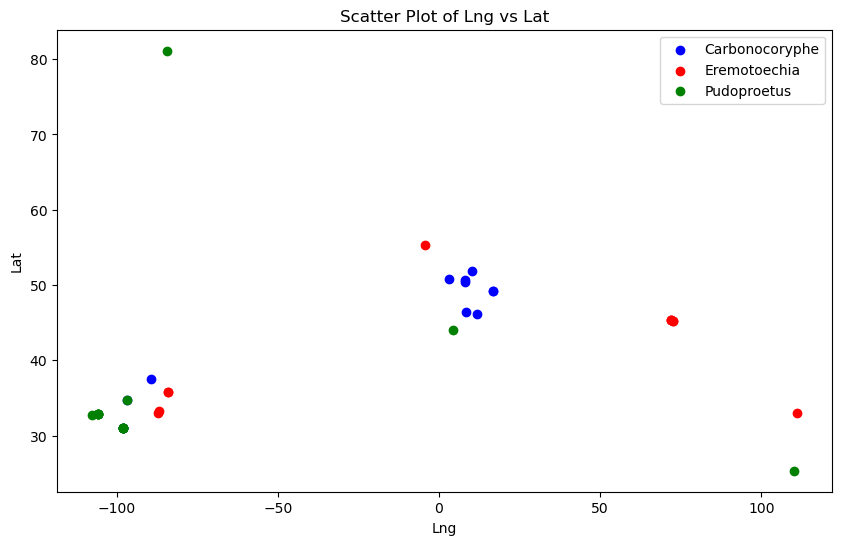

In [11]:
color_map = {
    'Carbonocoryphe': 'blue',
    'Pudoproetus': 'green',
    'Eremotoechia': 'red'
}
plot_scatter(color_map, filtered_table, 'lng', 'lat', 'genus')


##### Decision boundary for k = 3 

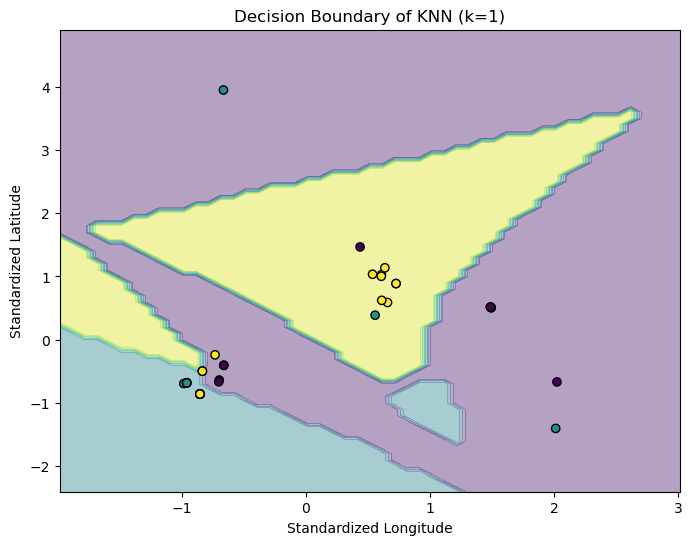

In [12]:
X = filtered_table[['lng', 'lat']]
y = filtered_table['genus']

y = filtered_table['genus'].replace({'Carbonocoryphe': 2,'Pudoproetus': 1, 'Eremotoechia': 0})
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and train the k-nearest neighbors classifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_scaled, y)


# Plot the decision boundary
h = 0.1  # step size in the mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.xlabel('Standardized Longitude')
plt.ylabel('Standardized Latitude')
plt.title('Decision Boundary of KNN (k=1)')
plt.show()

In [13]:
accuracy = knn_classification(filtered_table, ['lng', 'lat'], 'genus', test_size=0.2, n_neighbors=2)


print("Accuracy:", accuracy)

Accuracy: 0.75


#### iii) kNN classification on bigger data

In [14]:
filtered_table2 = new_table[new_table['genus'].isin(['Ostrea', 'Composita', 'Chlamys'])]

In [15]:
filtered_table2= filtered_table2.sample(frac=1).reset_index(drop=True)# --> shuffle the rows 
filtered_table2

lng        lat      genus
0       6.933333  46.000000     Ostrea
1     -71.302002 -14.207000  Composita
2     132.050003  43.466667    Chlamys
3       6.618333  46.044998    Chlamys
4       5.250000  45.716667    Chlamys
...          ...        ...        ...
5076  -87.416664  31.783333     Ostrea
5077   -1.566667  50.666668     Ostrea
5078 -104.758102  31.917700  Composita
5079  -94.985832  37.345554  Composita
5080  -88.433334  32.250000     Ostrea

[5081 rows x 3 columns]

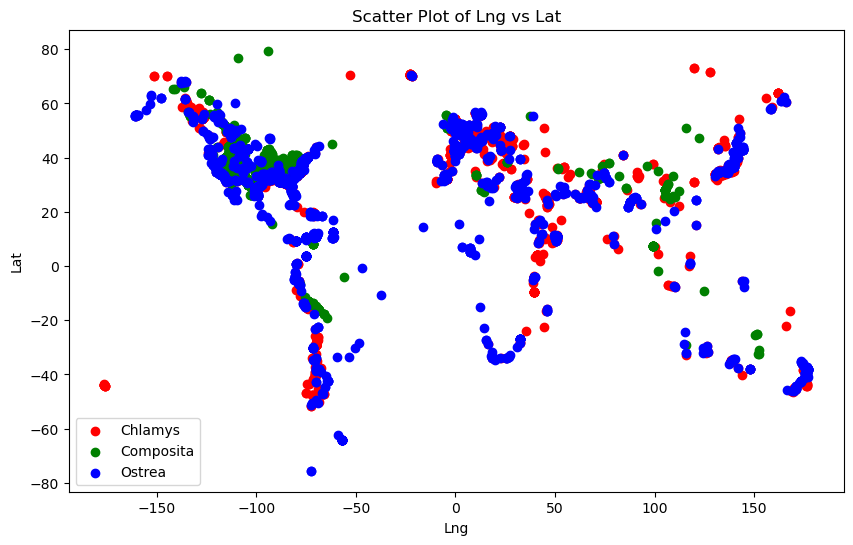

In [16]:
color_map = {
    'Ostrea': 'blue',
    'Composita': 'green',
    'Chlamys': 'red'
}

# Create a scatter plot
plot_scatter(color_map, filtered_table2, 'lng', 'lat', 'genus')


#### iv) Drawing the decision boundary for k =3 

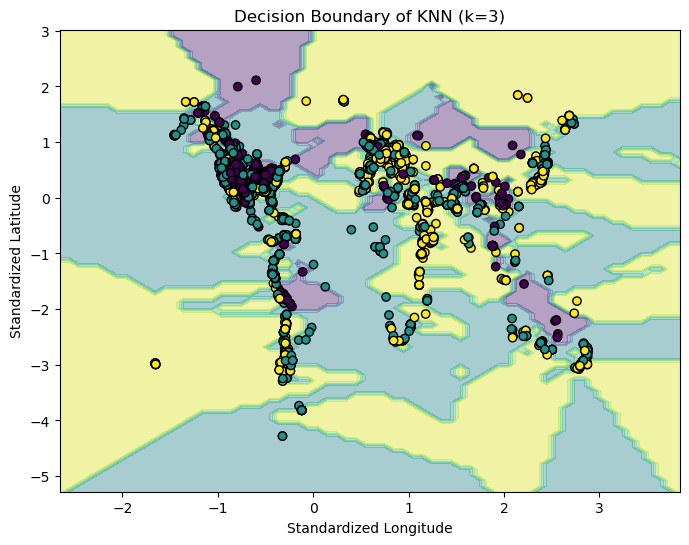

In [40]:
X = filtered_table2[['lng', 'lat']]
y = filtered_table2['genus']

y = filtered_table2['genus'].replace({'Chlamys': 2,'Ostrea': 1, 'Composita': 0})
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and train the k-nearest neighbors classifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_scaled, y)


# Plot the decision boundary
h = 0.1  # step size in the mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.xlabel('Standardized Longitude')
plt.ylabel('Standardized Latitude')
plt.title('Decision Boundary of KNN (k=3)')
plt.show()

In [18]:
accuracy = knn_classification(filtered_table2, ['lng', 'lat'], 'genus', test_size=0.2, n_neighbors=2)


print("Accuracy:", accuracy)

Accuracy: 0.8259587020648967


Very good accuracy at around 80% 

However, there are **major problems**  to such approach : 

- we taking the longitude and latitude of species that may have lived millions years away but maybe at the same place --> time has to be taken into account 

- longitude and latitude in 2D is prone to many errors (example : fossile in Alaska and in Kamchatka are close but in terms of longitude and latitude there are in opposite places)

### c) Expanding kNN to 10 genera 

In [39]:
filtered_table3 = new_table[new_table['genus'].isin(['Ostrea', 'Composita', 'Chlamys','Inoceramus','Derbyia',"Panderodus","Nuculana","Polygnathus","Cleiothyridina","Modiolus"])]
filtered_table3 = filtered_table3.sample(frac=1).reset_index(drop=True) #randomizing 

In [49]:
accuracy3 = knn_classification(filtered_table3, ['lng', 'lat'], 'genus', test_size=0.2, n_neighbors=7)
print("Accuracy:", accuracy3)

Accuracy: 0.6044830079537238


Testing with different values of n_neighbors, we find that the accuracy for testing with 10 genera is caped at 60%

### Paleolongitude kNN 

#### a) knn with 3 genera 

In [50]:
paleotable = data[['paleolng', 'paleolat', 'genus']].copy()

In [51]:
filtered_paleotable = paleotable[paleotable['genus'].isin(['Ostrea', 'Composita', 'Chlamys'])]
filtered_paleotable = filtered_paleotable.sample(frac=1).reset_index(drop=True)

In [52]:
accuracy = knn_classification(filtered_paleotable, ['paleolng', 'paleolat'], 'genus', test_size=0.2, n_neighbors=3)
accuracy

0.8426745329400197

#### b) knn with 10 genera 

In [55]:
filtered_paleotable2 = paleotable[paleotable['genus'].isin(['Ostrea', 'Composita', 'Chlamys','Inoceramus','Derbyia',"Panderodus","Nuculana","Polygnathus","Cleiothyridina","Modiolus"])]
filtered_paleotable2 = filtered_paleotable2.sample(frac=1).reset_index(drop=True)
accuracy4 = knn_classification(filtered_paleotable2, ['paleolng', 'paleolat'], 'genus', test_size=0.2, n_neighbors=9)
accuracy4

0.6077368040491685

 Once again even when using paleocoordinate when extending genera to more than 3, the accuracy gets quickly caped at 60. Hence another solution has to be provided. The solution might be to do kNN on 3D ? 

---
## 2) k nearest neighbor 3D (Space/ Time/ genuses) <a id='knn3d'></a>

#### [Jump back to glossary](#glossary)

### a) Preprocessing

In this section, we will work on 3D KNN to predict the 10 most common genuses. The first step will be to determine a metric and find a way to renormalize the distances so that KNN doesn't arbitrarily perceive some variables as more important than others.

In [56]:
#defining a new metric for 3D knn using haversine distance and difference in time
from sklearn.metrics.pairwise import haversine_distances
def timespace_metric(X: np.array ,Y: np.array):
    place1=X[:2]
    place2=Y[:2]
    space= haversine_distances([place1],[place2])/np.pi
    time=np.abs(X[-1]-Y[-1])/587.99415
    return (space+time)[0][0]

In [57]:
# checking for the max time difference to renormalize
matrix=data.values
mat=(matrix[:, 0]+matrix[:, 1])/2
M=max(mat)
m=min(mat)
M-m

587.99415

In [58]:
#looks good
timespace_metric(np.array([0,0,0]),np.array([np.pi,0,0]))

1.0

Now that we have a working metric, we will create our data from the large dataset. We decided to only choose 10 genuses to experiment with this, since we were not sure this would generalize well to a large number of genuses. We added a time variable compared to the previous model, we decided to simply average the minimum and the maximum dating of the fossil since this would serve as a good simple data point. We then shuffle the rows to not have any arbitrary bias when choosing the test data set.

In [59]:
#creating the right subdataframe
data3d=data.copy
data3d=data[['lng', 'lat', 'genus']].copy()
data3d['time']=(data['max_ma']+data['min_ma'])/2
data3d = data3d[data3d['genus'].isin(['Ostrea', 'Composita', 'Chlamys','Inoceramus','Derbyia',"Panderodus","Nuculana","Polygnathus","Cleiothyridina","Modiolus"])]
data3d = data3d.sample(frac=1).reset_index(drop=True) # randomize the rows so that there is no bias in the order of the rows
data3d

lng        lat           genus      time
0      -98.007774  38.646111        Nuculana  106.7500
1      -87.290558  31.990833          Ostrea   63.8000
2     -113.854721  50.739723      Inoceramus   84.6500
3       46.333332  23.083332         Chlamys  167.2000
4     -113.816666  44.366669  Cleiothyridina  328.7500
...           ...        ...             ...       ...
13822   -4.147500  31.001944     Polygnathus  377.4500
13823    8.366667  52.066666      Inoceramus   96.5500
13824   15.076225  60.937080      Panderodus  447.5500
13825 -115.250000  39.500000       Composita  262.5000
13826  -76.817497  35.359722         Chlamys    4.4665

[13827 rows x 4 columns]

Now we create the model as a callable function so we can experiment with certain variables like number of neighbors, importance of time with respect to space, and vary the test_size as well.

In [27]:
def train3dknn(timespaceratio,neighbors=5,test_size=100,shuffle=False,features=['lng', 'lat','time'],data=data3d):
    #timespaceratio is time_importance/space_importance
    def timespace_metric_in(X: np.array ,Y: np.array):
        place1=X[:2]
        place2=Y[:2]
        space= haversine_distances([place1],[place2])/np.pi
        time=np.abs(X[-1]-Y[-1])/587.99415
        return (space+timespaceratio*time)[0][0]
    
    total_rows=len(data)
    # Select the indices for training and testing sets
    train_indices_3D = list(range(total_rows - test_size))  # Use all rows except the last 10 for training
    test_indices_3D = list(range(total_rows - test_size, total_rows))  # Use the last 10 rows for testing

    data3dknn=data.copy()
    if shuffle:
        data3dknn = data3dknn.sample(frac=1).reset_index(drop=True)
    
    # Split the DataFrame into training and testing sets
    x_train_3D = data3dknn.iloc[train_indices_3D][features]  # Assuming 'lng' and 'lat' are the features
    y_train_3D = data3dknn.iloc[train_indices_3D]['genus']
    x_test_3D = data3dknn.iloc[test_indices_3D][features]
    y_test_3D = data3dknn.iloc[test_indices_3D]['genus']
    
    
    #try to use k-nearest neighbor on simple data 
    model3d = sklearn.neighbors.KNeighborsClassifier(n_neighbors=neighbors,metric=timespace_metric_in)
    model3d.fit(X=x_train_3D, y=y_train_3D)
    
    # Make predictions on the test set
    y_pred_3D = model3d.predict(x_test_3D)
    
    accuracy3D = accuracy_score(y_test_3D, y_pred_3D)
    return accuracy3D

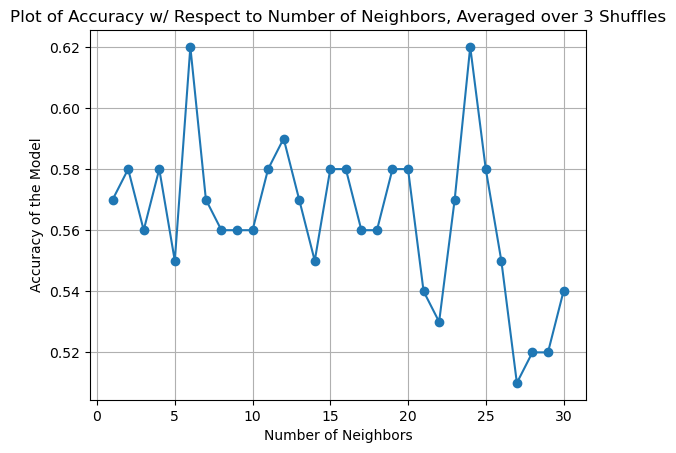

In [28]:
#reshu=[np.average([train3dknn(1,neighbors=i,shuffle=True) for j in range(3)]) for i in range(1,31)]
#reshu (result was rounded)


shuffled_acc_per_neigh= [0.57, 0.58, 0.56, 0.58, 0.55, 0.62, 0.57, 0.56, 0.56, 0.56,
                         0.58, 0.59, 0.57, 0.55, 0.58, 0.58, 0.56, 0.56, 0.58, 0.58,
                         0.54, 0.53, 0.57, 0.62, 0.58, 0.55, 0.51, 0.52, 0.52, 0.54]

# Plotting
plt.plot(np.arange(1,31), shuffled_acc_per_neigh, marker='o')
plt.title('Plot of Accuracy w/ Respect to Number of Neighbors, Averaged over 3 Shuffles')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy of the Model')
plt.grid(True)
plt.show()


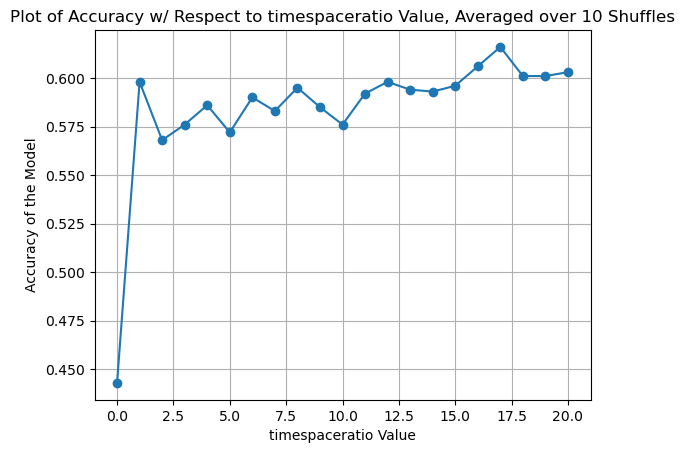

In [29]:
#[np.average([train3dknn(i,neighbors=6,shuffle=True) for j in range(10)]) for i in range(11)]=[0.445, 0.59 , 0.587, 0.621, 0.582, 0.6  , 0.565, 0.592, 0.575,0.588, 0.605]

shuffled_acc_per_timespace=[0.443, 0.598, 0.568, 0.576, 0.586, 0.572, 0.59 , 0.583, 0.595,
       0.585, 0.576, 0.592, 0.598, 0.594, 0.593, 0.596, 0.606, 0.616,
       0.601, 0.601, 0.603]
# Plotting
plt.plot(shuffled_acc_per_timespace, marker='o')
plt.title('Plot of Accuracy w/ Respect to timespaceratio Value, Averaged over 10 Shuffles')
plt.xlabel('timespaceratio Value')
plt.ylabel('Accuracy of the Model')
plt.grid(True)
plt.show()


### b) Visualizing data

#### With 3 genera

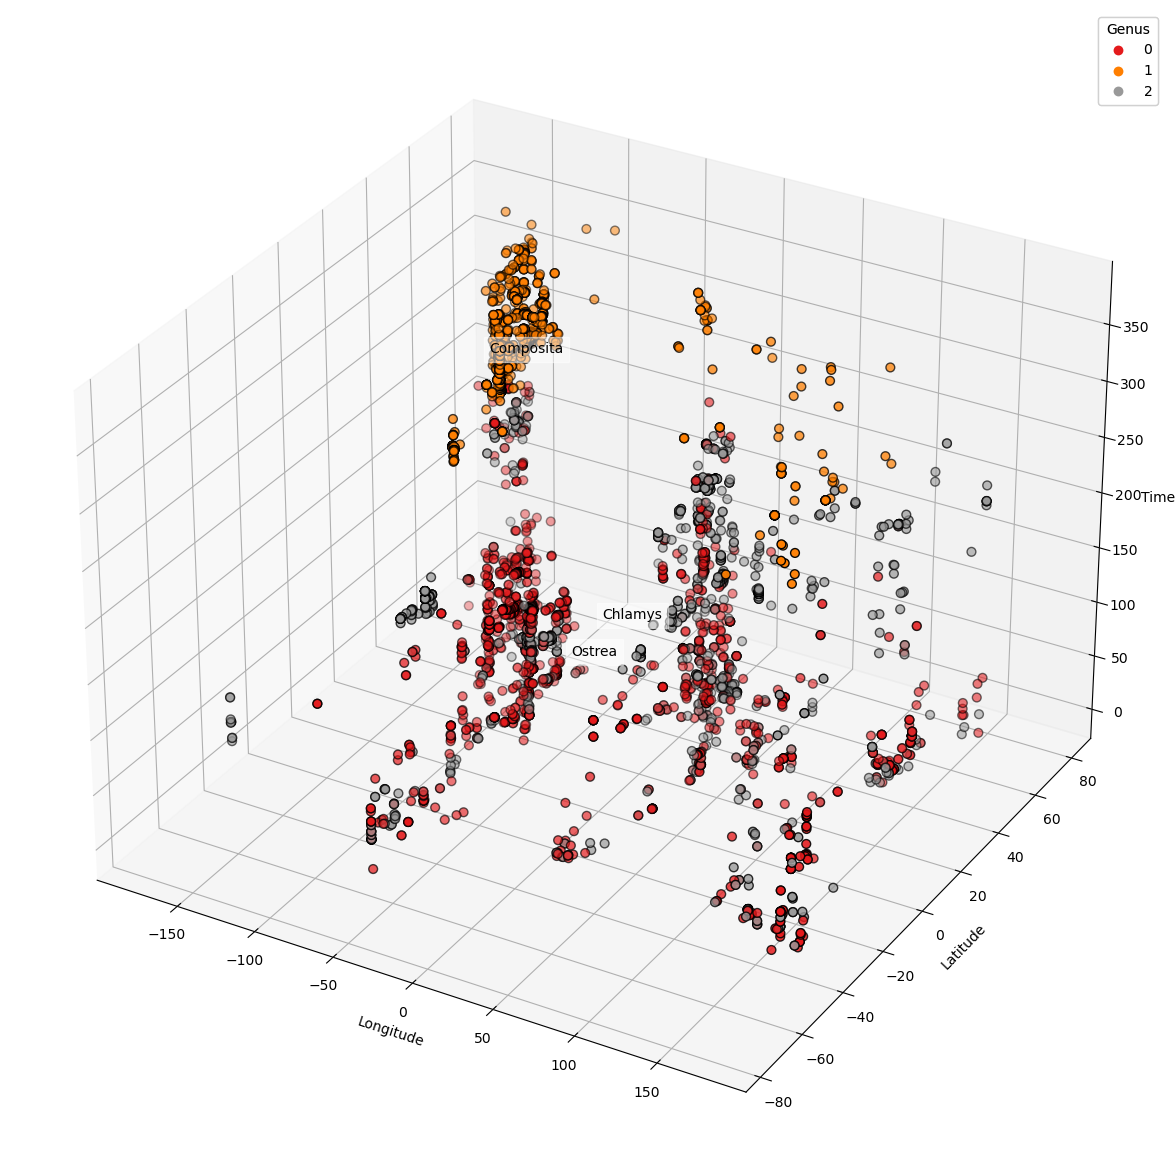

In [30]:
#3D Vizualisation added recently by me --> Oscar :) 

from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data3d['lng'], data3d['lat'], data3d['time'], c=data3d['genus'].map({'Ostrea': 0, 'Composita': 1, 'Chlamys': 2}), cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Time')

# Create a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Genus")
ax.add_artist(legend1)


for name, label in [('Ostrea', 0), ('Composita', 1), ('Chlamys', 2)]:
    ax.text3D(data3d[data3d['genus'] == name]['lng'].mean(),
              data3d[data3d['genus'] == name]['lat'].mean(),
              data3d[data3d['genus'] == name]['time'].mean(),
              name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

plt.show()


#### With 10 genera

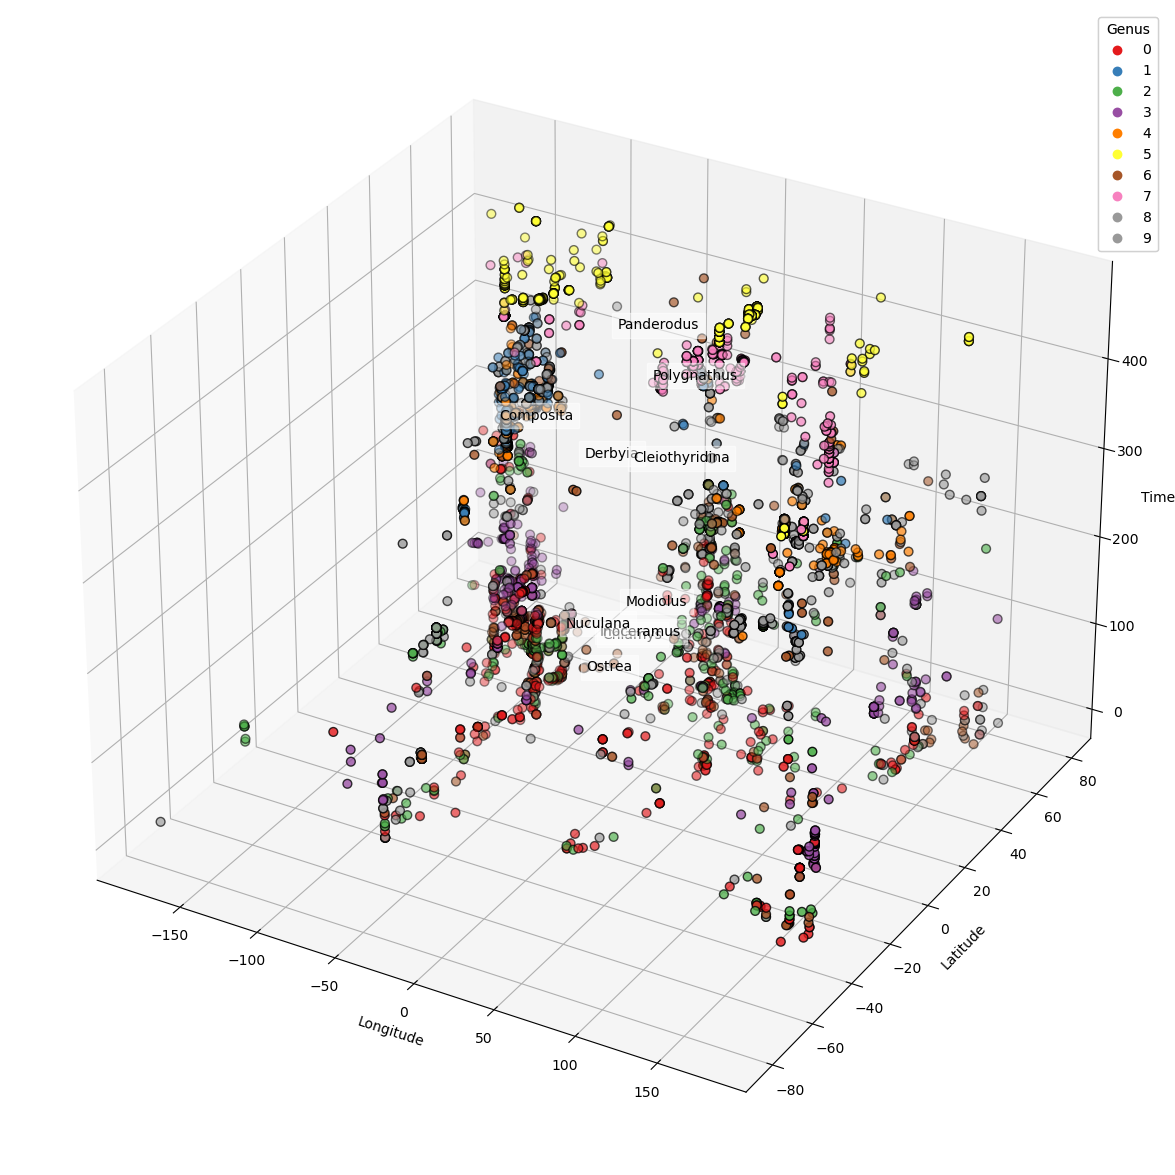

In [31]:
fig = plt.figure(figsize=(20, 15))  # Adjust the size as needed

ax = fig.add_subplot(111, projection='3d')

# Filter data to include only the first 100 occurrences of each genus
filtered_data = pd.concat([data3d[data3d['genus'] == name][:500] for name in ['Ostrea', 'Composita', 'Chlamys', 'Inoceramus', 'Derbyia', 'Panderodus', 'Nuculana', 'Polygnathus', 'Cleiothyridina', 'Modiolus']])

scatter = ax.scatter(filtered_data['lng'], filtered_data['lat'], filtered_data['time'], c=filtered_data['genus'].map({'Ostrea': 0, 'Composita': 1, 'Chlamys': 2, 'Inoceramus':3, 'Derbyia': 4, 'Panderodus': 5, 'Nuculana': 6, 'Polygnathus': 7, 'Cleiothyridina': 8, 'Modiolus': 9}), cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Time')

# Create a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Genus")
ax.add_artist(legend1)

genus_names = ['Ostrea', 'Composita', 'Chlamys', 'Inoceramus', 'Derbyia', 'Panderodus', 'Nuculana', 'Polygnathus', 'Cleiothyridina', 'Modiolus']
for name in genus_names:
    ax.text3D(filtered_data[filtered_data['genus'] == name]['lng'].mean(),
              filtered_data[filtered_data['genus'] == name]['lat'].mean(),
              filtered_data[filtered_data['genus'] == name]['time'].mean(),
              name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

plt.show()

In [32]:
train3dknn(3)

0.56

### Paleolongitude + Time

In [33]:
# Creating the dataset the exact same way as before
paleodata3d=data.copy
paleodata3d=data[['paleolng', 'paleolat', 'genus']].copy()
paleodata3d['time']=(data['max_ma']+data['min_ma'])/2
paleodata3d = paleodata3d[paleodata3d['genus'].isin(['Ostrea', 'Composita', 'Chlamys','Inoceramus','Derbyia',"Panderodus","Nuculana","Polygnathus","Cleiothyridina","Modiolus"])]
paleodata3d = paleodata3d.sample(frac=1).reset_index(drop=True) # randomize the rows so that there is no bias in the order of the rows
paleodata3d

paleolng  paleolat           genus     time
0         51.89    -38.60         Derbyia  257.035
1        -18.02    -31.65         Chlamys  186.300
2         10.17     53.04         Chlamys  186.750
3        -31.30     -3.24       Composita  301.150
4       -100.62     67.41      Inoceramus  102.450
...         ...       ...             ...      ...
13822     -7.03    -37.29     Polygnathus  390.500
13823    -33.60      0.65  Cleiothyridina  275.800
13824    -33.41     -6.69         Derbyia  304.650
13825    -45.14    -27.65  Cleiothyridina  331.200
13826    171.53     67.99        Modiolus   28.465

[13827 rows x 4 columns]

In [34]:
train3dknn(3,neighbors= 8, features=['paleolat','paleolng','time'],data=paleodata3d)

0.62

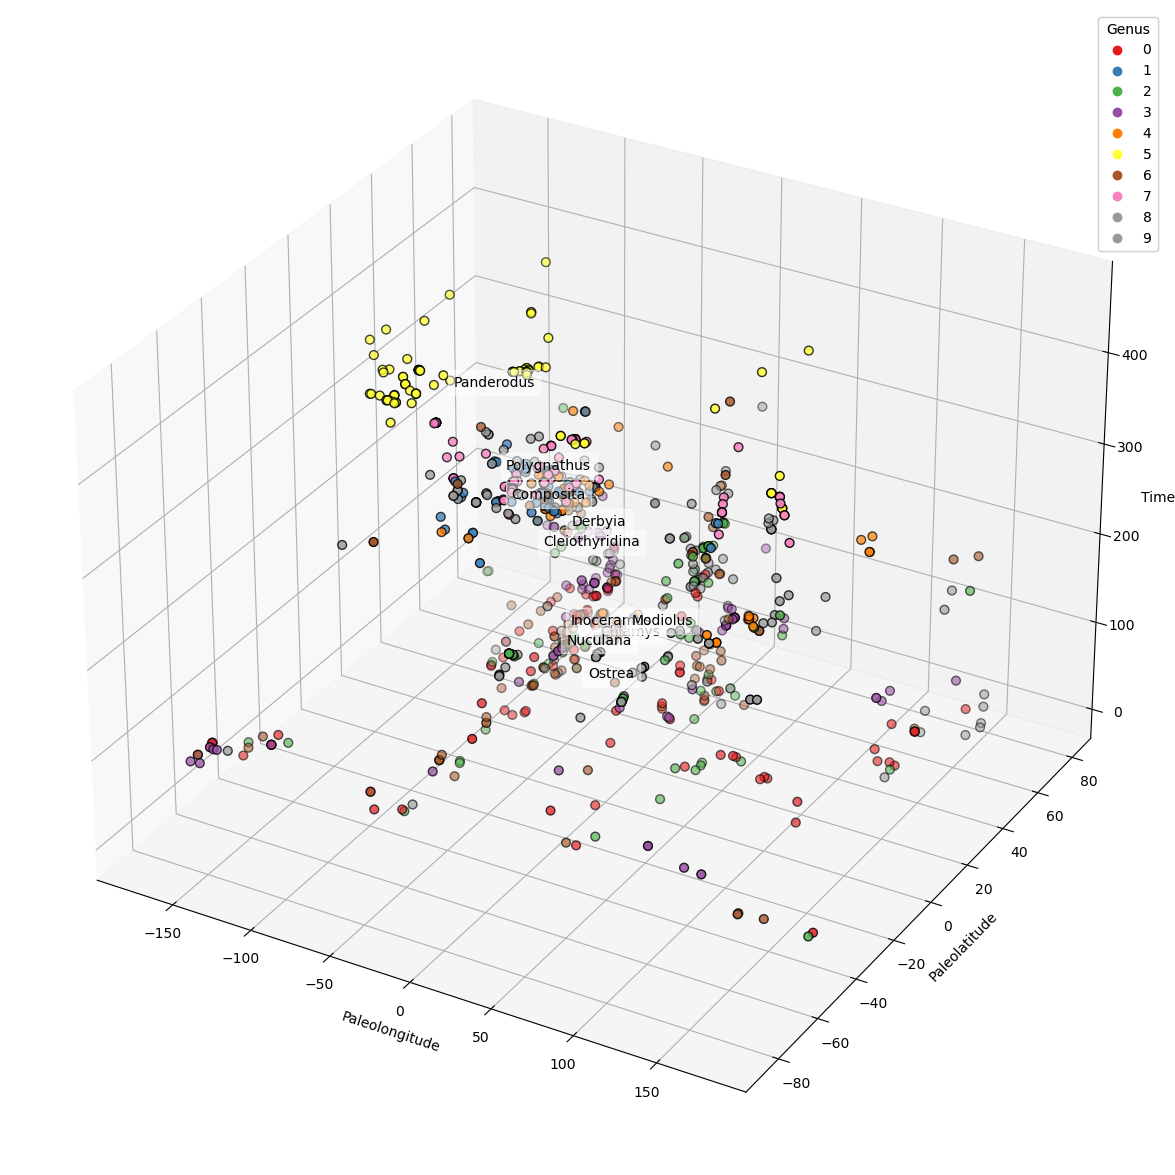

In [35]:
fig = plt.figure(figsize=(20, 15))  # Adjust the size as needed

ax = fig.add_subplot(111, projection='3d')

# Filter data to include only the first 100 occurrences of each genus
filtered_paleodata = pd.concat([paleodata3d[paleodata3d['genus'] == name][:100] for name in ['Ostrea', 'Composita', 'Chlamys', 'Inoceramus', 'Derbyia', 'Panderodus', 'Nuculana', 'Polygnathus', 'Cleiothyridina', 'Modiolus']])

scatter = ax.scatter(filtered_paleodata['paleolng'], filtered_paleodata['paleolat'], filtered_paleodata['time'], c=filtered_paleodata['genus'].map({'Ostrea': 0, 'Composita': 1, 'Chlamys': 2, 'Inoceramus':3, 'Derbyia': 4, 'Panderodus': 5, 'Nuculana': 6, 'Polygnathus': 7, 'Cleiothyridina': 8, 'Modiolus': 9}), cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_xlabel('Paleolongitude')
ax.set_ylabel('Paleolatitude')
ax.set_zlabel('Time')

# Create a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Genus")
ax.add_artist(legend1)

genus_names = ['Ostrea', 'Composita', 'Chlamys', 'Inoceramus', 'Derbyia', 'Panderodus', 'Nuculana', 'Polygnathus', 'Cleiothyridina', 'Modiolus']
for name in genus_names:
    ax.text3D(filtered_paleodata[filtered_paleodata['genus'] == name]['paleolng'].mean(),
              filtered_paleodata[filtered_paleodata['genus'] == name]['paleolat'].mean(),
              filtered_paleodata[filtered_paleodata['genus'] == name]['time'].mean(),
              name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

plt.show()

In [36]:
data3d

lng        lat        genus     time
0      -87.629166  34.587502    Composita  331.200
1     -103.127777  30.354168    Composita  297.200
2      108.300003  24.450001  Polygnathus  385.200
3     -116.216667  39.216667  Polygnathus  390.500
4      -96.494446  37.643890    Composita  297.200
...           ...        ...          ...      ...
13822    1.866667  42.183334   Inoceramus   87.550
13823 -116.216667  39.216667   Panderodus  390.500
13824   27.283333  47.966667       Ostrea   13.175
13825    6.300000  46.716667       Ostrea  123.955
13826    9.000000  52.000000   Inoceramus   91.400

[13827 rows x 4 columns]

---
# 3) Logistic regression <a id='logistic_regression'></a>

#### [Jump back to glossary](#glossary)

---
# 4) Decision tree <a id='decision_tree'></a>

This section of the project is dedicated to creating a decision tree to attempt to classify each fossil based on criterions.

#### [Jump back to glossary](#glossary)

### a) Data processing

### b) Decision tree

### c) Visualization and results

---
# 5) PCA for higher dimensions <a id='pca'></a> 

#### [Jump back to glossary](#glossary)

In [37]:

#necessary imports 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

## a)  Coordinates + Paleolatitude + Time 

In [38]:
datapca = data[['paleolng', 'paleolat', 'genus', 'lat', 'lng']].copy()
datapca['time']=(data['max_ma']+data['min_ma'])/2
datapca = datapca[datapca['genus'].isin(['Ostrea', 'Composita', 'Chlamys','Inoceramus','Derbyia',"Panderodus","Nuculana","Polygnathus","Cleiothyridina","Modiolus"])]
datapca = datapca.sample(frac=1).reset_index(drop=True)
datapca

paleolng  paleolat           genus        lat         lng    time
0         23.98     47.62      Inoceramus  52.066666    8.366667   96.55
1         56.84     45.77         Chlamys  50.880833   44.736389   96.55
2         87.45    -11.47     Polygnathus  24.450001  108.300003  385.20
3         31.05     30.52         Derbyia  66.974998   49.750000  292.80
4        -95.29     74.61      Inoceramus  61.972778 -146.759720   77.85
...         ...       ...             ...        ...         ...     ...
13822     -7.19     -9.91     Polygnathus  50.954445   22.678612  385.20
13823    -60.75     37.32         Chlamys  35.269722  -79.059723   39.65
13824     76.17     22.51  Cleiothyridina  39.966667   76.133331  275.80
13825    -64.84     53.79          Ostrea  43.269444 -104.271667   69.05
13826     -6.26    -35.13     Polygnathus  31.376389   -4.174444  400.45

[13827 rows x 6 columns]